In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit

#### Reading files

In [153]:
telluric_path = r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\star_04\Telluric_template.dat"

td = pd.read_csv(telluric_path, sep="\s+", header=None, names=['wavelength', 'flux', 'err'])
td

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ryzho\AppData\Local\Temp\ipykernel_17956\4053269051.py:3: SyntaxWarning: invalid escape sequence '\s'
  td = pd.read_csv(telluric_path, sep="\s+", header=None, names=['wavelength', 'flux', 'err'])


,wavelength,flux,err
0,3500.11,1.000417,0.0
1,3500.12,1.000415,0.0
2,3500.13,1.000412,0.0
3,3500.14,1.000410,0.0
4,3500.15,1.000408,0.0
...,...,...,...
749984,10999.95,1.003412,0.0
749985,10999.96,1.003615,0.0
749986,10999.97,1.003800,0.0
749987,10999.98,1.003969,0.0


In [154]:
spectra_path = r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\star_04\betCas_2011-11-05_17-31-19.fits"

with fits.open(spectra_path, memmap=False) as hdul:
    hdu = hdul[0]
    flux_spec = hdu.data  # Extracting the wavelength column
    i = np.linspace(0, int(hdu.header['NAXIS1']), int(hdu.header['NAXIS1']))
    wavelength_spec = float(hdu.header['CRVAL1']) + float(hdu.header['CDELT1'])*i
    
hdu.header

 [astropy.io.fits.verify]


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                90312 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2011-11-25T13:36:04' / Date FITS file was generated                  
IRAF-TLM= '2011-11-28T11:31:58' / Time of last modification                     
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
HEAD    = 'DV436   '        

In [155]:
flux_spec

array([0.6148393 , 0.61470944, 0.63931954, ..., 1.0074487 , 1.0030932 ,
       1.0007764 ], shape=(90312,), dtype='>f4')

In [156]:
wavelength_spec

array([4289.99755859, 4290.03332461, 4290.06909062, ..., 7519.99060078,
       7520.02636679, 7520.06213281], shape=(90312,))

In [157]:
path_to_res = r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\star_04\res_tot_actual.txt"

res = pd.read_csv(path_to_res, sep="\s+", header=None, names=["IMAGE", "REF", "HJD", "AP", "CODES", "SHIFT", "HGHT", "FWHM", "TDR", "VOBS", "VREL", "VHELIO", "VERR"])
res

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ryzho\AppData\Local\Temp\ipykernel_17956\156686600.py:3: SyntaxWarning: invalid escape sequence '\s'
  res = pd.read_csv(path_to_res, sep="\s+", header=None, names=["IMAGE", "REF", "HJD", "AP", "CODES", "SHIFT", "HGHT", "FWHM", "TDR", "VOBS", "VREL", "VHELIO", "VERR"])


,IMAGE,REF,HJD,AP,CODES,SHIFT,HGHT,FWHM,TDR,VOBS,VREL,VHELIO,VERR
0,betCas_2011-11-05_17-31-19.fits,A,5871.23537,10,BNS/gau,6.313,0.96,145.62,93.71,1.7231,11.7629,-1.0286,1.208
1,betCas_2011-11-05_17-41-03.fits,A,5871.24213,10,BNS/gau,5.854,0.96,146.47,101.61,0.8679,10.9077,-1.8910,1.121
2,betCas_2011-11-05_17-49-05.fits,A,5871.24770,10,BNS/gau,5.886,0.96,145.13,117.98,0.9270,10.9668,-1.8380,0.958
3,betCas_2011-11-05_17-56-59.fits,A,5871.25319,10,BNS/gau,5.861,0.96,148.71,111.56,0.8812,10.9210,-1.8898,1.038
4,betCas_2011-11-05_18-05-23.fits,A,5871.25902,10,BNS/gau,6.337,0.96,146.24,105.57,1.7674,11.8072,-1.0101,1.078
5,betCas_2011-11-05_18-13-28.fits,A,5871.26464,10,BNS/gau,6.682,0.96,147.11,114.05,2.4104,12.4503,-0.3736,1.004
6,betCas_2011-11-05_18-21-25.fits,A,5871.27016,10,BNS/gau,7.186,0.96,149.51,103.07,3.3498,13.3896,0.5594,1.128
7,betCas_2011-11-05_18-29-35.fits,A,5871.27583,10,BNS/gau,7.735,0.96,152.11,132.39,4.3719,14.4118,1.5749,0.896
8,betCas_2011-11-05_18-37-26.fits,A,5871.28128,10,BNS/gau,8.254,0.95,154.52,99.49,5.3389,15.3788,2.5355,1.208
9,betCas_2011-11-05_18-45-24.fits,A,5871.28681,10,BNS/gau,8.739,0.95,155.63,91.34,6.2439,16.2838,3.4339,1.324


#### Plotting data

##### Stellar spectrum + telluric lines template

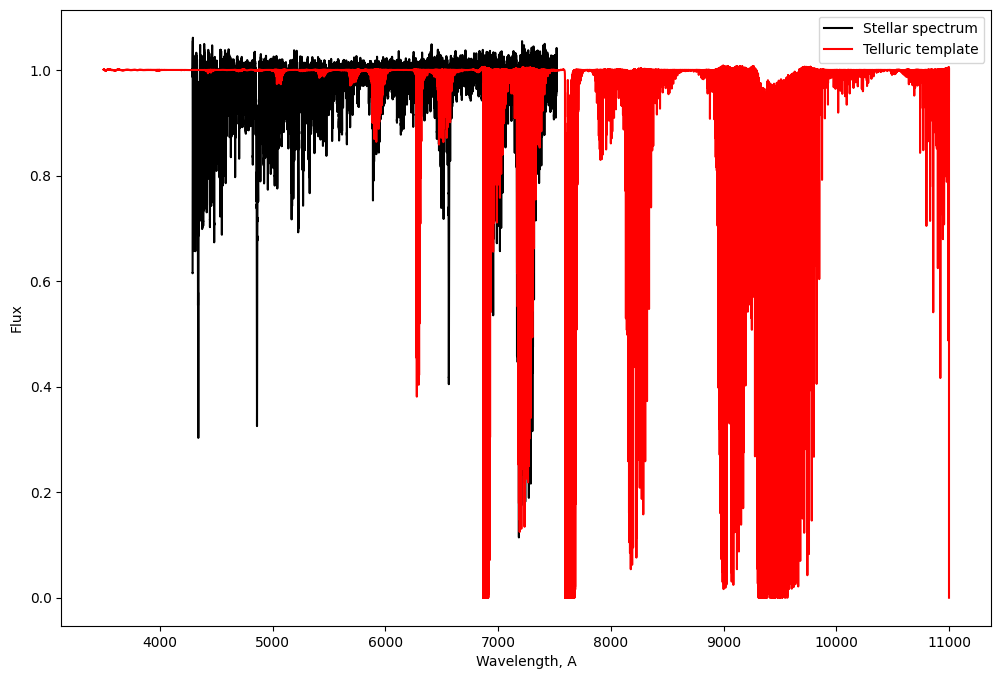

In [158]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(wavelength_spec, flux_spec, color='k', label='Stellar spectrum')
ax.plot(td["wavelength"], td["flux"], color='red', label='Telluric template')
ax.legend()

ax.set_xlabel("Wavelength, A")
ax.set_ylabel("Flux")

plt.show()

##### V_helio vs. dates

In [159]:
res["date"] = res["HJD"] - 5871

C:\Users\ryzho\AppData\Local\Temp\ipykernel_17956\2688496160.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


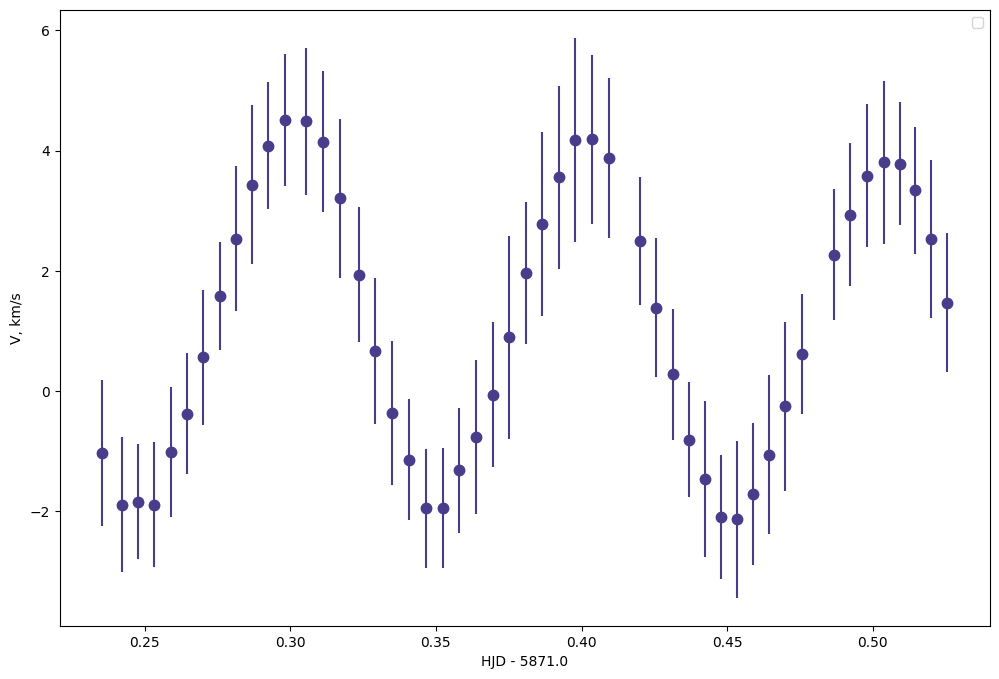

In [160]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.errorbar(res["date"], res["VHELIO"], yerr=res["VERR"], color='darkslateblue', marker='.', ms=15, fmt=" ")

ax.set_xlabel("HJD - 5871.0")
ax.set_ylabel("V, km/s")

ax.legend()
plt.show()

##### Fitting function

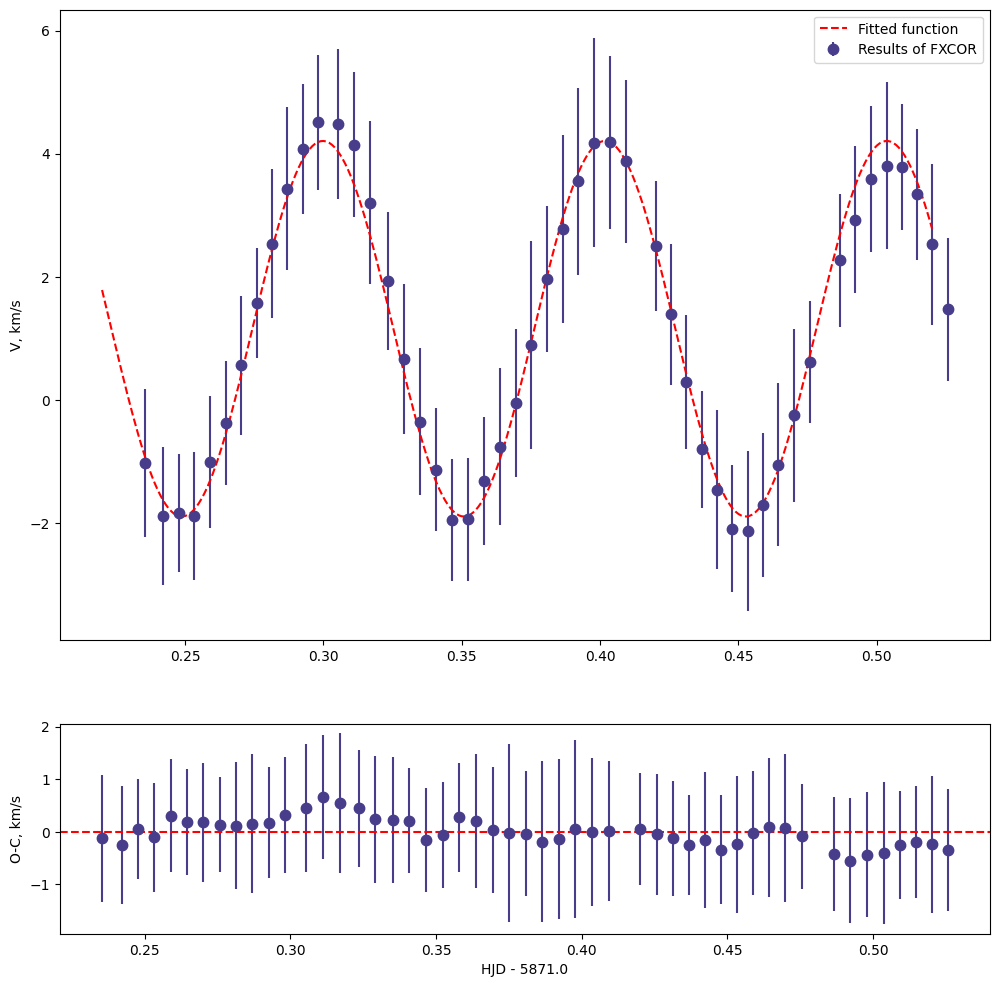

In [161]:
def func(x, a, b, c, d):
    return a*np.sin(b*x + d) + c


popt, _ = curve_fit(func, res["date"], res["VHELIO"], p0=[3.0, 50.0, 1.57, 1.0], sigma=res["VERR"], absolute_sigma=True)

fig, ax = plt.subplots(2, 1, figsize = (12, 12), height_ratios=[3, 1])

ax[0].errorbar(res["date"], res["VHELIO"], yerr=res["VERR"], color='darkslateblue', marker='.', ms=15, fmt=" ", label='Results of FXCOR')

x = np.arange(0.22, 0.52, 0.001)
# popt = [3.0, 50.0, 1.57, 1.0]
ax[0].plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), color='red', linestyle='dashed', label='Fitted function')

ax[0].set_ylabel("V, km/s")
ax[0].legend()

ax[1].errorbar(res["date"], res["VHELIO"] - func(res["date"], popt[0], popt[1], popt[2], popt[3]), color="darkslateblue", marker='.', ms=15, fmt=" ", yerr=res["VERR"])
ax[1].axhline(0, color='red', linestyle='dashed')
ax[1].set_ylabel("O-C, km/s")
ax[1].set_xlabel("HJD - 5871.0")


plt.show()